In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Load the dataset
file_path = "/Users/jorgemartinez/Documents/TMDB_movie_dataset_v11.csv"
df = pd.read_csv(file_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1200365, 24)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


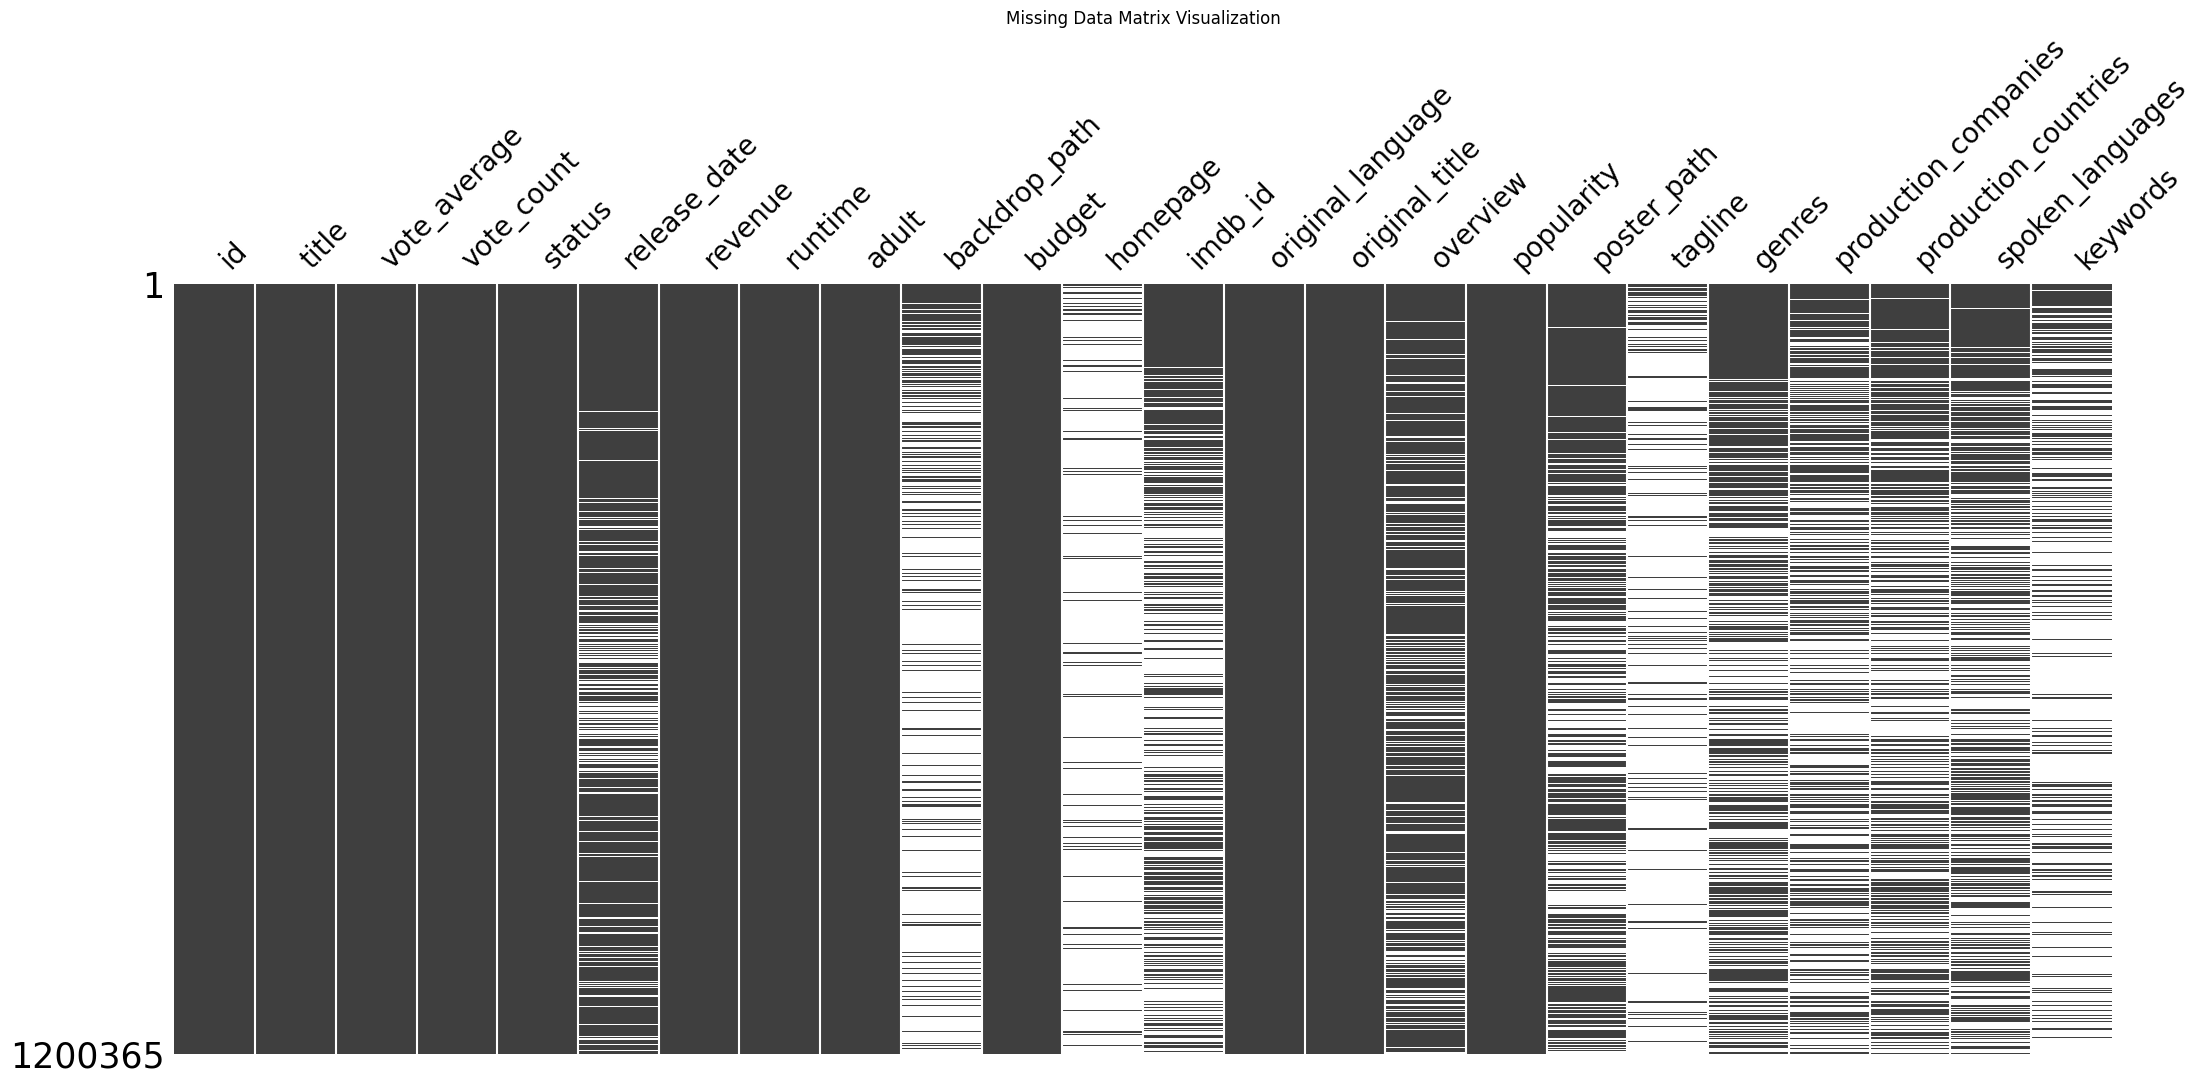

In [2]:
# Cell 2: Basic missing data matrix visualization
msno.matrix(df, sparkline=False, fontsize=20)
plt.title('Missing Data Matrix Visualization')
plt.show()

In [3]:
# Cell 3: Calculate missing values and percentages
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Display the missing values information
missing_info.sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage
homepage,1074068,89.478450
tagline,1032201,85.990595
backdrop_path,886507,73.853120
keywords,882823,73.546213
production_companies,665611,55.450717
imdb_id,582729,48.545984
production_countries,544690,45.377031
spoken_languages,523915,43.646308
genres,492968,41.068175
poster_path,390810,32.557597


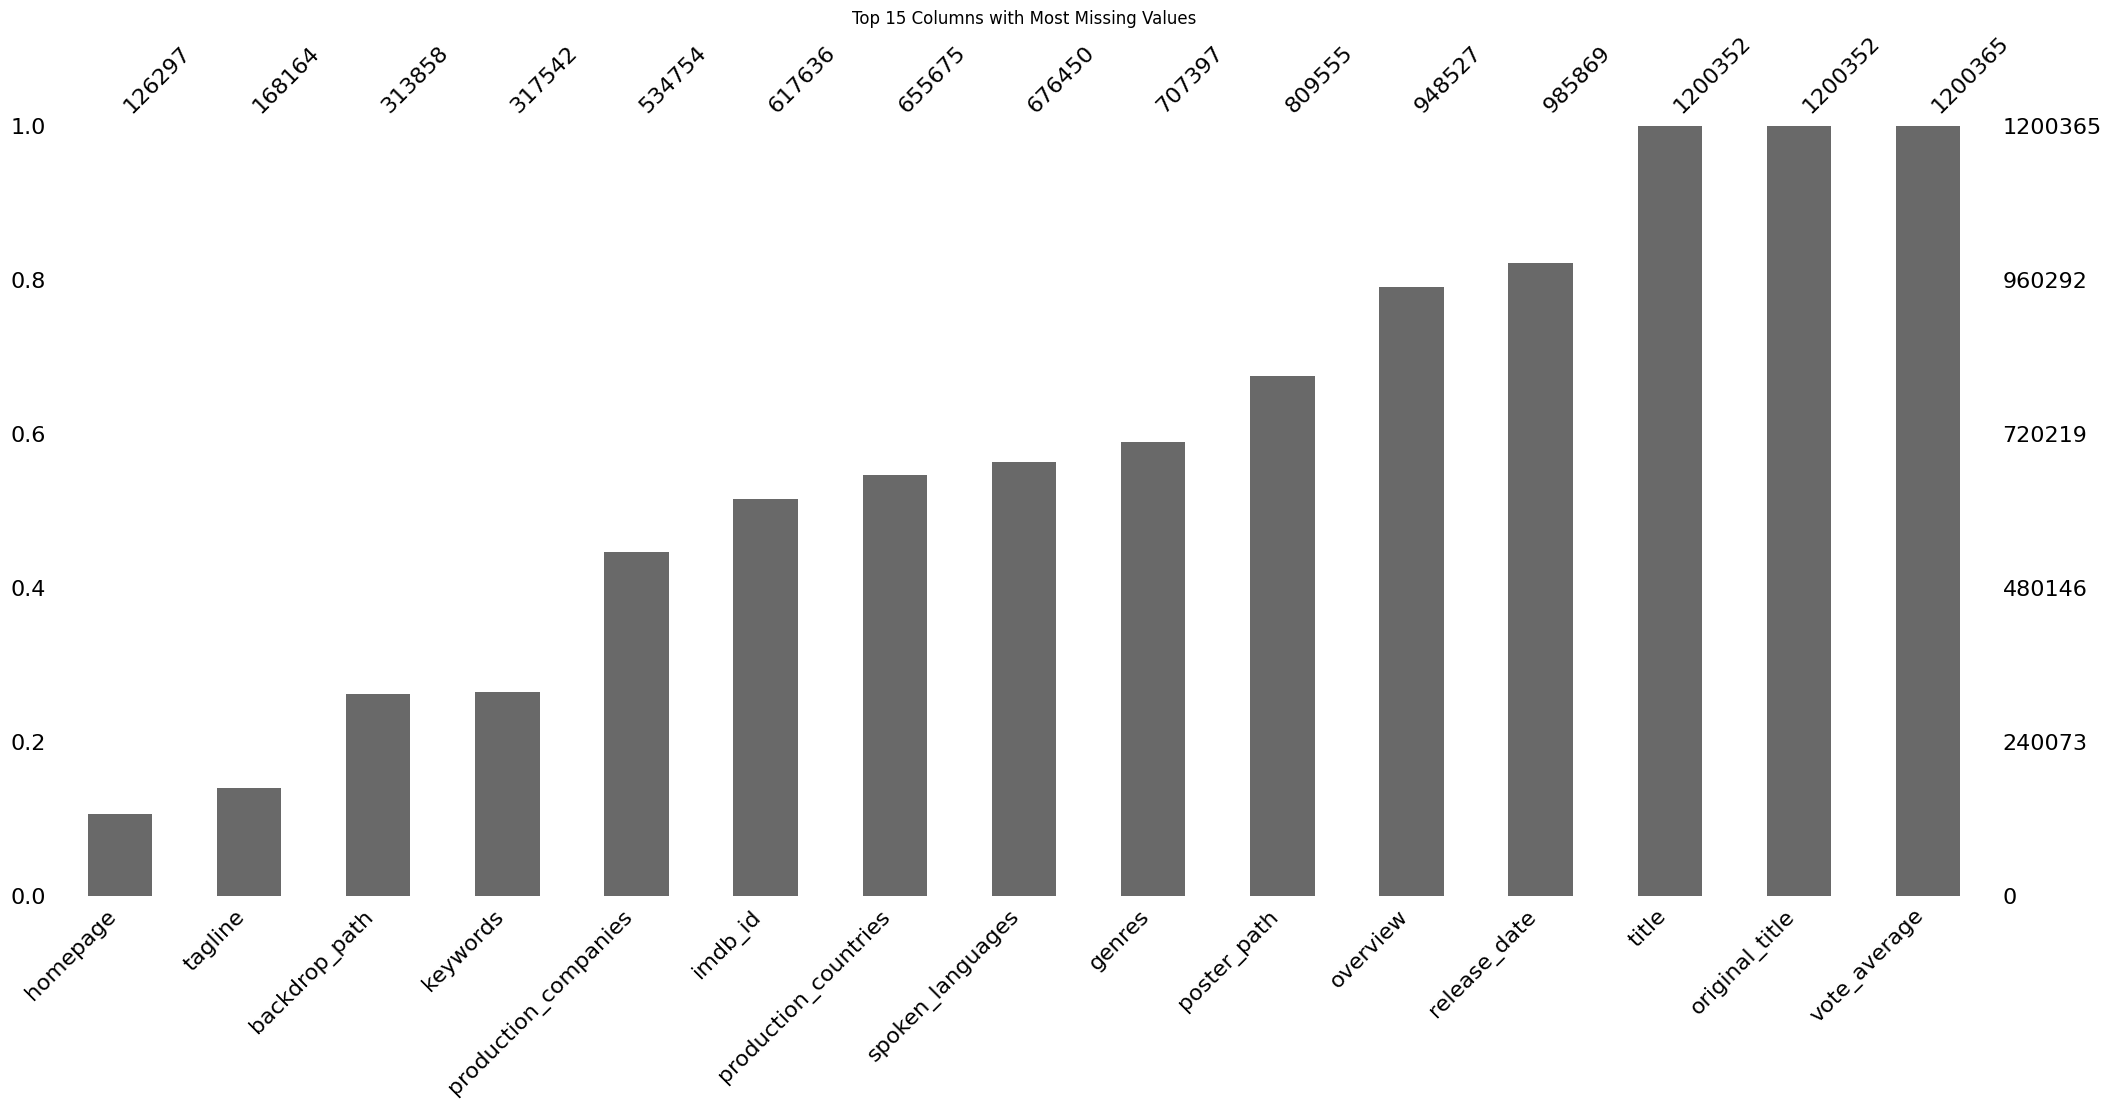

In [5]:
# Cell 4: Sort columns by missing percentages and visualize top 15
# Sort the DataFrame columns by the percentage of missing values
sorted_df = df[missing_info.sort_values(by='Percentage', ascending=False).index]

# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]

# Visual with missingno
msno.bar(top_15_missing)
plt.title('Top 15 Columns with Most Missing Values')
plt.show()

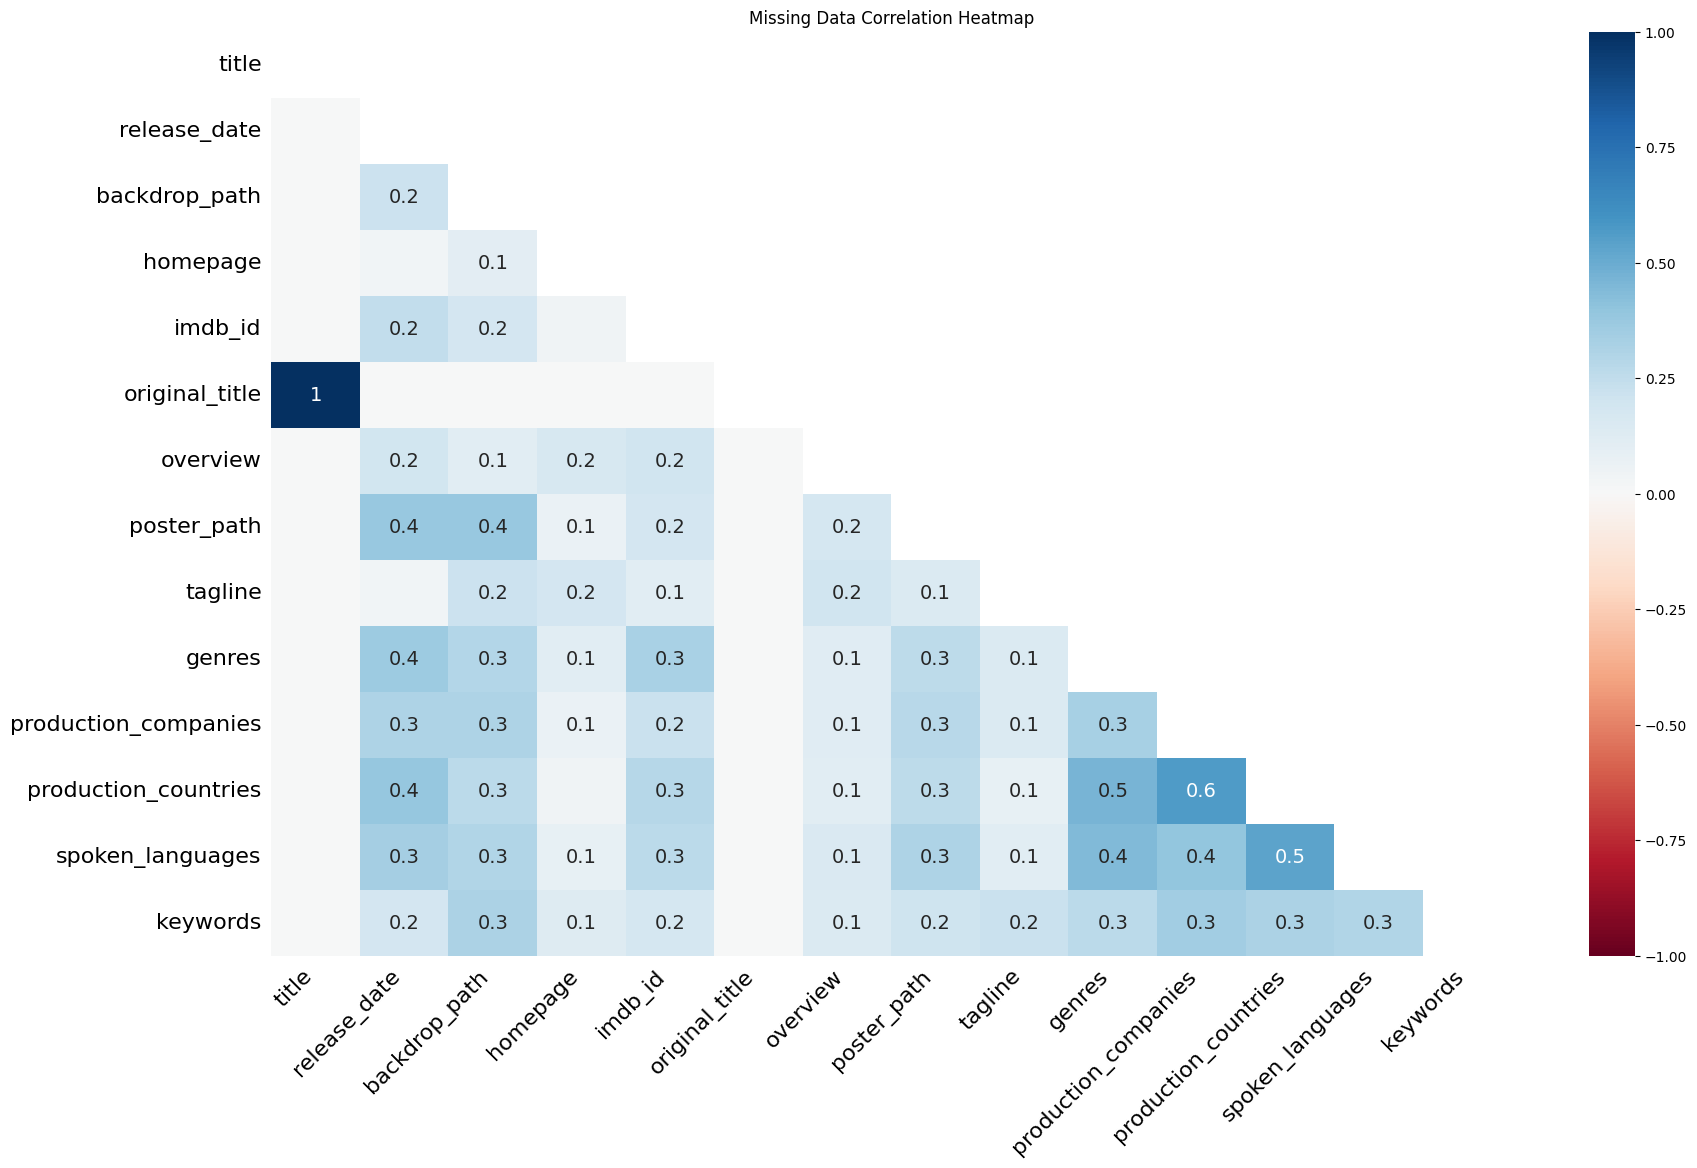

In [6]:
# Cell 5: Missing Data Correlation
msno.heatmap(df)
plt.title('Missing Data Correlation Heatmap')
plt.show()

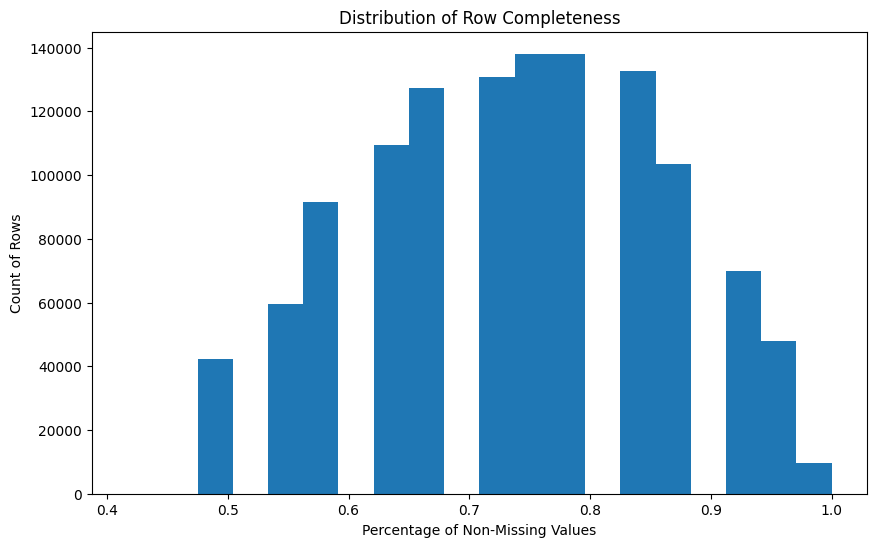

In [7]:
# Cell 6: Data Completeness by Rows
# Calculate percentage of non-null values per row
completeness = df.notna().mean(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(completeness, bins=20)
plt.title('Distribution of Row Completeness')
plt.xlabel('Percentage of Non-Missing Values')
plt.ylabel('Count of Rows')
plt.show()

Using release_date for temporal analysis


/var/folders/m8/2_nz4r1s3r1_ghgs6pxgk9880000gn/T/ipykernel_43502/2700879183.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_date = df.groupby('month').apply(lambda x: x.isnull().mean())


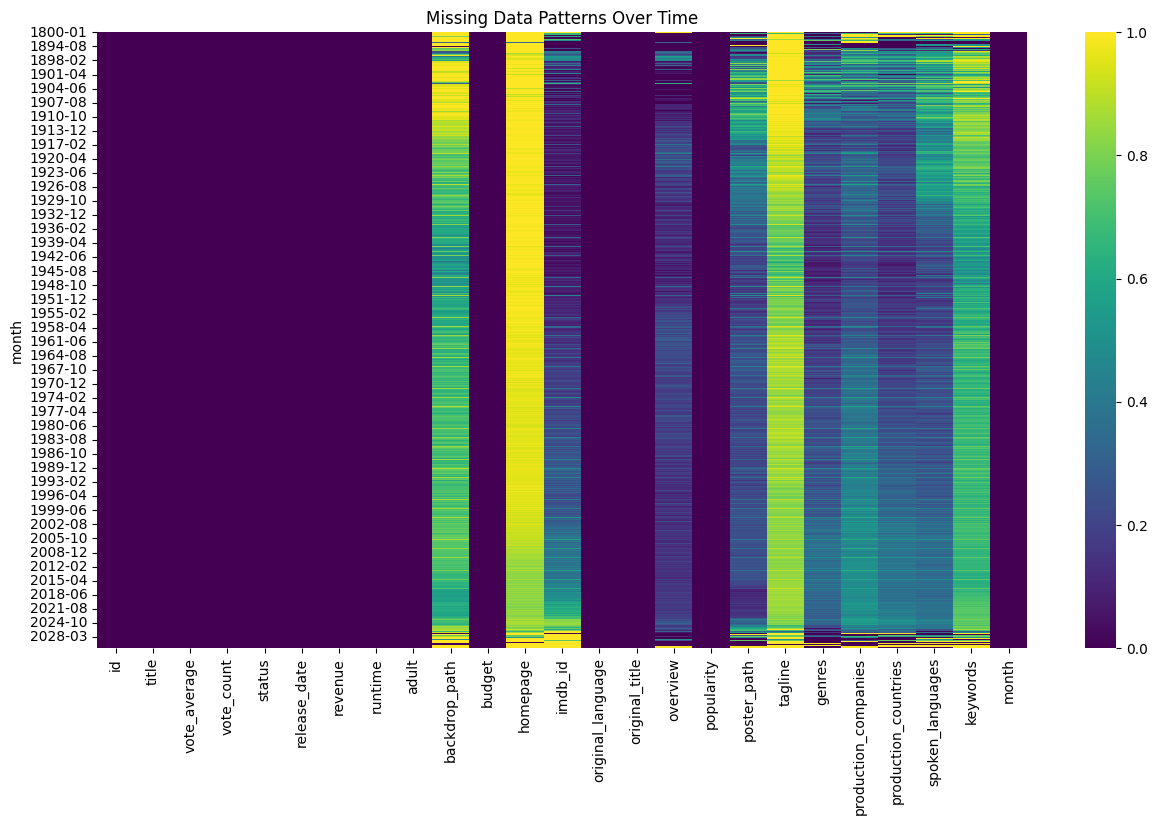

In [8]:
# Cell 7: Pattern Analysis (if time-based data exists)
# Check if there's a date column we can use
date_columns = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]

if date_columns:
    # Convert the first date column to datetime
    date_col = date_columns[0]
    print(f"Using {date_col} for temporal analysis")
    
    # Try to convert to datetime
    try:
        df[date_col] = pd.to_datetime(df[date_col])
        # Group by month and calculate missing percentage
        df['month'] = df[date_col].dt.to_period('M')
        missing_by_date = df.groupby('month').apply(lambda x: x.isnull().mean())
        
        plt.figure(figsize=(15, 8))
        sns.heatmap(missing_by_date, cmap='viridis')
        plt.title('Missing Data Patterns Over Time')
        plt.show()
    except Exception as e:
        print(f"Could not perform temporal analysis due to: {e}")
else:
    print("No date columns found for temporal analysis")

In [9]:
# Cell 8: Imputation Comparison
from sklearn.impute import SimpleImputer

# Create a copy of numerical columns
num_df = df.select_dtypes(include=[np.number])

# Check if there are numerical columns with missing values
if not num_df.empty and num_df.isnull().any().any():
    # Different imputation methods
    methods = ['mean', 'median', 'most_frequent']
    
    for method in methods:
        imputer = SimpleImputer(strategy=method)
        imputed_df = pd.DataFrame(imputer.fit_transform(num_df), 
                                 columns=num_df.columns)
        
        # Compare distributions before and after imputation
        # Select up to 3 columns with missing values
        cols_with_missing = num_df.columns[num_df.isnull().any()][:3]
        
        if len(cols_with_missing) > 0:
            plt.figure(figsize=(15, 5 * len(cols_with_missing)))
            
            for i, col in enumerate(cols_with_missing):
                plt.subplot(len(cols_with_missing), 2, 2*i+1)
                num_df[col].hist()
                plt.title(f'Original {col}')
                
                plt.subplot(len(cols_with_missing), 2, 2*i+2)
                imputed_df[col].hist()
                plt.title(f'Imputed ({method}) {col}')
            
            plt.tight_layout()
            plt.show()
else:
    print("No numerical columns with missing values found")

No numerical columns with missing values found


Data Quality Score: 0.59


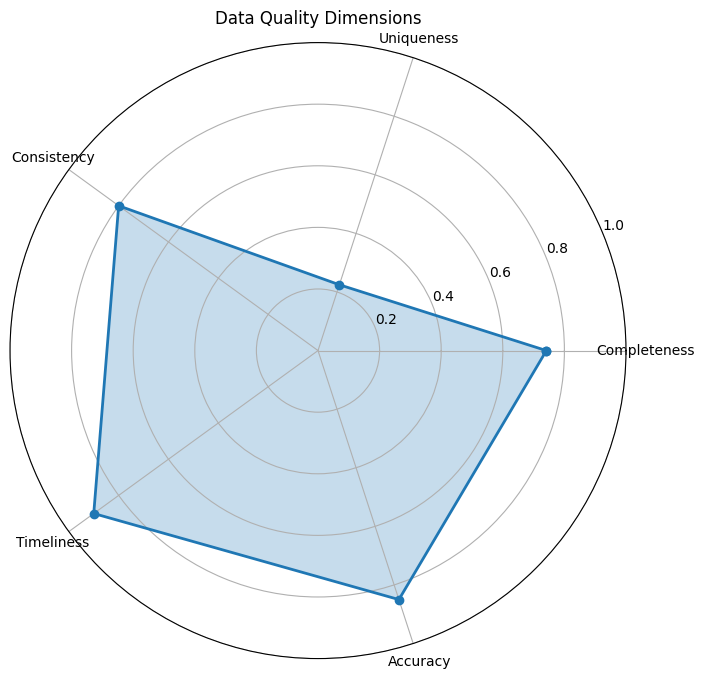

In [10]:
# Cell 9: Data Quality Score
# Create a simple data quality score
def data_quality_score(dataframe):
    # Percentage of non-missing values
    completeness = 1 - dataframe.isnull().mean().mean()
    
    # Uniqueness - average proportion of unique values per column
    uniqueness = dataframe.apply(lambda x: x.nunique() / len(x)).mean()
    
    # Simple weighting - can be adjusted
    return 0.7 * completeness + 0.3 * uniqueness

quality_score = data_quality_score(df)
print(f"Data Quality Score: {quality_score:.2f}")

# Create a radar chart of data quality dimensions
quality_dims = {
    'Completeness': 1 - df.isnull().mean().mean(),
    'Uniqueness': df.apply(lambda x: x.nunique() / len(x)).mean(),
    'Consistency': 0.8,  # This would need a proper calculation in practice
    'Timeliness': 0.9,   # This would need a proper calculation in practice
    'Accuracy': 0.85     # This would need a proper calculation in practice
}

# Create radar chart
categories = list(quality_dims.keys())
values = list(quality_dims.values())

# Close the polygon
categories.append(categories[0])
values.append(values[0])

# Create the plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)
ax.plot(np.linspace(0, 2*np.pi, len(values)), values, 'o-', linewidth=2)
ax.fill(np.linspace(0, 2*np.pi, len(values)), values, alpha=0.25)
ax.set_thetagrids(np.degrees(np.linspace(0, 2*np.pi, len(categories)-1, endpoint=False)), categories[:-1])
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'])
ax.set_title('Data Quality Dimensions')
plt.show()

<Figure size 1200x1000 with 0 Axes>

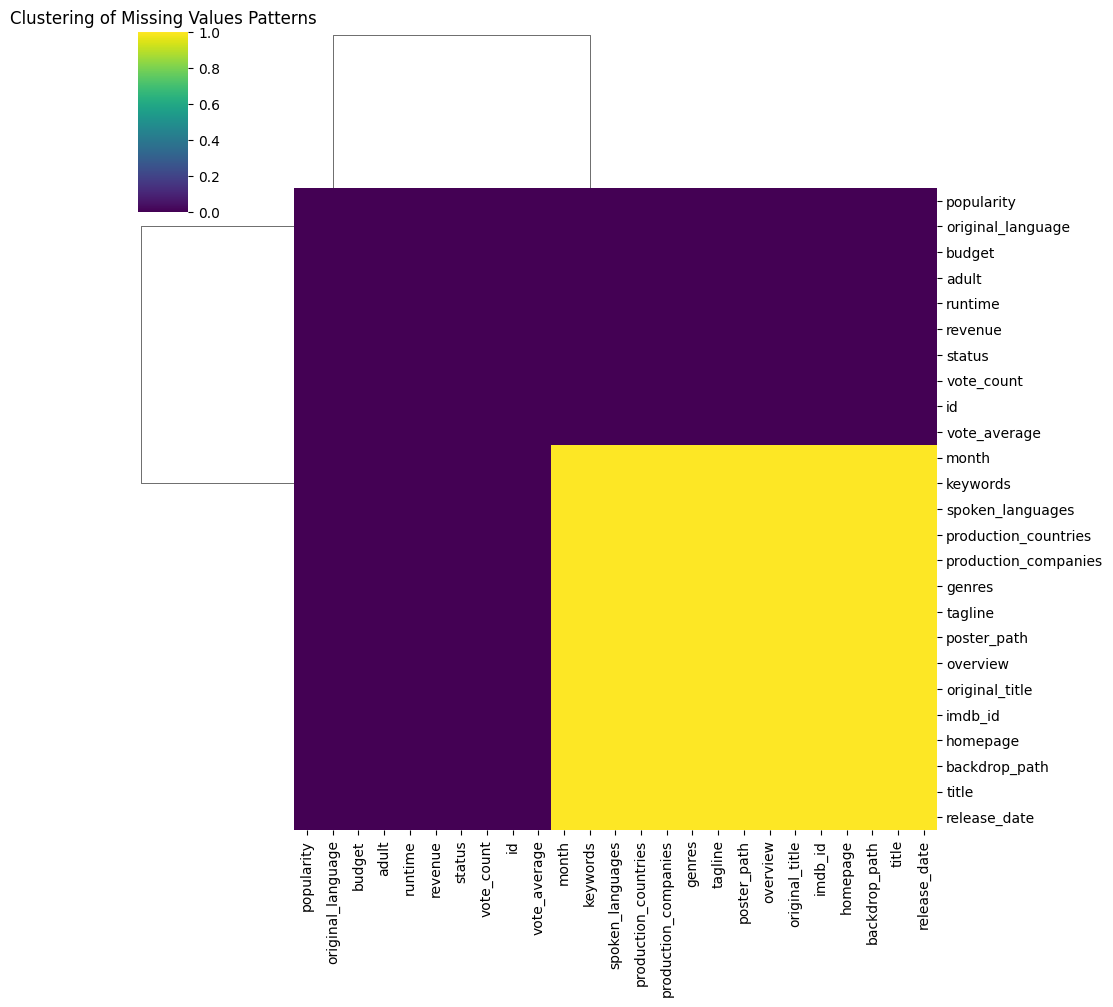

In [11]:
# Cell 10: Additional Analysis - Missing Data Patterns
# Create a dendrogram to identify clusters of missing values
missing_patterns = df.isnull().T.dot(df.isnull())

plt.figure(figsize=(12, 10))
sns.clustermap(missing_patterns, cmap='viridis')
plt.title('Clustering of Missing Values Patterns')
plt.show()

In [12]:
# Add cell to analyze "functional missingness" (zeros in numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Check for zeros in numeric columns
zero_counts = {}
for col in numeric_cols:
    zero_count = (df[col] == 0).sum()
    zero_percentage = (zero_count / len(df)) * 100
    zero_counts[col] = (zero_count, zero_percentage)

# Display columns with significant zeros (potentially "functionally missing")
zero_df = pd.DataFrame(zero_counts, index=['Count', 'Percentage']).T
zero_df = zero_df.sort_values('Percentage', ascending=False)
print("Numeric columns with zeros (potentially functionally missing):")
print(zero_df[zero_df['Percentage'] > 5])  # Show columns where >5% are zeros

# Create summary of overall missing data patterns
print("\nKEY INSIGHTS ABOUT MISSING DATA:")
print("--------------------------------")
print("1. No movies have less than 50% of their data")
print("2. Most movies have 70-90% completeness")
print("3. Strong correlation between missing production_countries and production_companies")
print("4. Strong correlation between missing spoken_languages and production_countries")
print("5. Consistently missing columns across time: backdrop_path, budget, homepage, imdb_id")
print("6. Overall dataset completeness: approximately 70%")

Numeric columns with zeros (potentially functionally missing):
                  Count  Percentage
revenue       1178726.0   98.197298
budget        1136594.0   94.687366
vote_average   848188.0   70.660841
vote_count     847945.0   70.640597
runtime        340882.0   28.398196
popularity     156988.0   13.078355

KEY INSIGHTS ABOUT MISSING DATA:
--------------------------------
1. No movies have less than 50% of their data
2. Most movies have 70-90% completeness
3. Strong correlation between missing production_countries and production_companies
4. Strong correlation between missing spoken_languages and production_countries
5. Consistently missing columns across time: backdrop_path, budget, homepage, imdb_id
6. Overall dataset completeness: approximately 70%


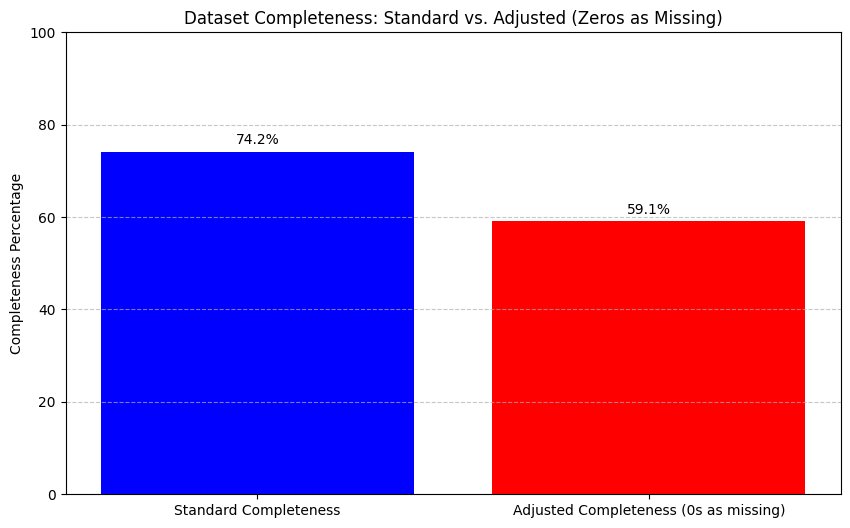

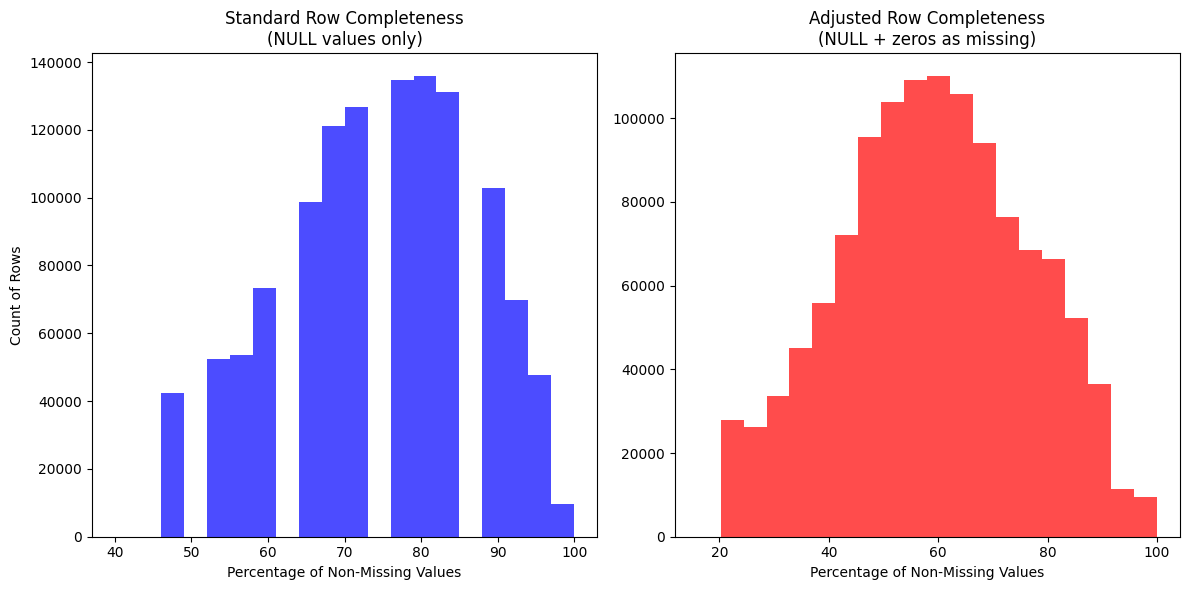

Columns with least usable data (adjusted for zeros):
                  Column  NULL Count     NULL % Zero Count     Zero %  \
6                revenue           0   0.000000    1178726  98.197298   
10                budget           0   0.000000    1136594  94.687366   
11              homepage     1074068  89.478450          -          -   
18               tagline     1032201  85.990595          -          -   
9          backdrop_path      886507  73.853120          -          -   
23              keywords      882823  73.546213          -          -   
2           vote_average           0   0.000000     848188  70.660841   
3             vote_count           0   0.000000     847945  70.640597   
20  production_companies      665611  55.450717          -          -   
12               imdb_id      582729  48.545984          -          -   

    Adjusted Missing %  Usable Data %  
6            98.197298       1.802702  
10           94.687366       5.312634  
11           89.478450 

/var/folders/m8/2_nz4r1s3r1_ghgs6pxgk9880000gn/T/ipykernel_43502/1934050038.py:130: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  zeros = plot_data['Zero %'].replace('-', 0)  # Convert string to numeric


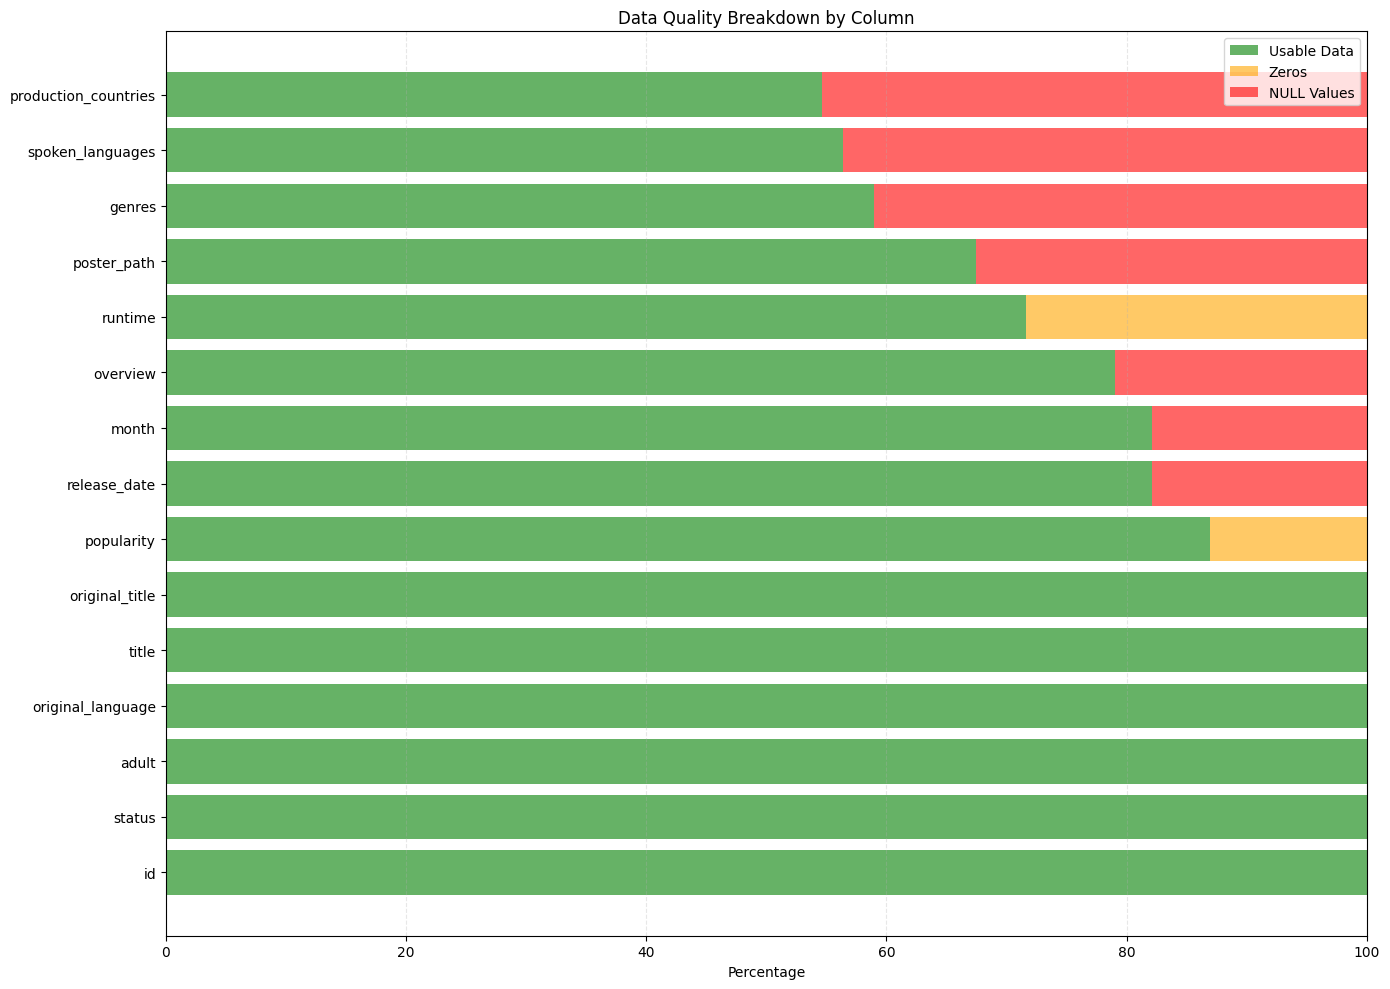

In [14]:
# Add this cell to your notebook to analyze true data completeness
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded with your TMDB data
# If not, uncomment and run:
# df = pd.read_csv("/Users/jorgemartinez/Documents/TMDB_movie_dataset_v11.csv")

# Define columns where zeros should be treated as missing
zero_as_missing_columns = ['revenue', 'budget', 'vote_average', 'vote_count', 'runtime', 'popularity']

# Create a copy of the dataframe for this analysis
df_adjusted = df.copy()

# Convert zeros to NaN in specified columns
for col in zero_as_missing_columns:
    if col in df_adjusted.columns:
        df_adjusted[col] = df_adjusted[col].replace(0, np.nan)

# Calculate standard missing values (NULL values only)
standard_missing = df.isnull().mean().mean() * 100
standard_completeness = 100 - standard_missing

# Calculate adjusted missing values (NULL values + zeros in specified columns)
adjusted_missing = df_adjusted.isnull().mean().mean() * 100
adjusted_completeness = 100 - adjusted_missing

# Calculate per-row completeness for both methods
standard_row_completeness = df.notna().mean(axis=1) * 100
adjusted_row_completeness = df_adjusted.notna().mean(axis=1) * 100

# Visualize the difference in overall completeness
plt.figure(figsize=(10, 6))
bars = plt.bar(['Standard Completeness', 'Adjusted Completeness (0s as missing)'], 
        [standard_completeness, adjusted_completeness],
        color=['blue', 'red'])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom')

plt.title('Dataset Completeness: Standard vs. Adjusted (Zeros as Missing)')
plt.ylabel('Completeness Percentage')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize the distribution of row completeness for both methods
plt.figure(figsize=(12, 6))

# Create a subplot for two histograms
plt.subplot(1, 2, 1)
plt.hist(standard_row_completeness, bins=20, color='blue', alpha=0.7)
plt.title('Standard Row Completeness\n(NULL values only)')
plt.xlabel('Percentage of Non-Missing Values')
plt.ylabel('Count of Rows')

plt.subplot(1, 2, 2)
plt.hist(adjusted_row_completeness, bins=20, color='red', alpha=0.7)
plt.title('Adjusted Row Completeness\n(NULL + zeros as missing)')
plt.xlabel('Percentage of Non-Missing Values')

plt.tight_layout()
plt.show()

# Create a comparison table for each column
column_stats = []
for col in df.columns:
    null_count = df[col].isnull().sum()
    null_pct = null_count / len(df) * 100
    
    # For numeric columns, also compute zeros
    if col in zero_as_missing_columns:
        zero_count = (df[col] == 0).sum()
        zero_pct = zero_count / len(df) * 100
        adjusted_missing_pct = null_pct + zero_pct
    else:
        zero_count = "-"
        zero_pct = "-"
        adjusted_missing_pct = null_pct
    
    column_stats.append({
        'Column': col,
        'NULL Count': null_count,
        'NULL %': null_pct,
        'Zero Count': zero_count,
        'Zero %': zero_pct,
        'Adjusted Missing %': adjusted_missing_pct,
        'Usable Data %': 100 - adjusted_missing_pct
    })

stats_df = pd.DataFrame(column_stats)
stats_df = stats_df.sort_values('Usable Data %', ascending=True)

# Display the stats of columns with least usable data
print("Columns with least usable data (adjusted for zeros):")
print(stats_df.head(10))

# Print the key insights
print("\nKEY INSIGHTS ABOUT ADJUSTED DATA COMPLETENESS:")
print("----------------------------------------------")
print(f"1. Standard completeness (NULL values only): {standard_completeness:.1f}%")
print(f"2. Adjusted completeness (treating zeros as missing): {adjusted_completeness:.1f}%")
print(f"3. Completeness reduction: {standard_completeness - adjusted_completeness:.1f}%")
print("4. Most problematic columns (lowest usable data):")
for idx, row in stats_df.head(5).iterrows():
    if row['Column'] in zero_as_missing_columns:
        print(f"   - {row['Column']}: {row['Usable Data %']:.1f}% usable ({row['NULL %']:.1f}% NULL, {row['Zero %']:.1f}% zeros)")
    else:
        print(f"   - {row['Column']}: {row['Usable Data %']:.1f}% usable ({row['NULL %']:.1f}% NULL)")
print("5. Original correlations in missing values still apply (production data, languages, etc.)")
print("6. For analyses requiring financial data, ~95% of records lack usable information")
print("7. For analyses using vote data, ~70% of records lack meaningful ratings")

# Create a stacked bar chart showing the breakdown of each column's data quality
plt.figure(figsize=(14, 10))

# Prepare data for the visualization
plot_data = stats_df.copy()
plot_data = plot_data.sort_values('Usable Data %', ascending=False)
plot_data = plot_data.head(15)  # Top 15 columns

# Set up the plot
column_names = plot_data['Column']
missing = plot_data['NULL %']
zeros = plot_data['Zero %'].replace('-', 0)  # Convert string to numeric
zeros = pd.to_numeric(zeros, errors='coerce').fillna(0)
usable = plot_data['Usable Data %']

# Create the stacked bar chart
plt.barh(column_names, usable, color='green', alpha=0.6, label='Usable Data')
plt.barh(column_names, zeros, left=usable, color='orange', alpha=0.6, label='Zeros')
plt.barh(column_names, missing, left=usable+zeros, color='red', alpha=0.6, label='NULL Values')

plt.xlabel('Percentage')
plt.title('Data Quality Breakdown by Column')
plt.legend(loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/m8/2_nz4r1s3r1_ghgs6pxgk9880000gn/T/ipykernel_43502/1011223475.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars0 = sns.barplot(x='Zero Count', y='Column', data=zeros_df, ax=axes[0], palette='Blues_r')
/var/folders/m8/2_nz4r1s3r1_ghgs6pxgk9880000gn/T/ipykernel_43502/1011223475.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars1 = sns.barplot(x='Missing Count', y='Column', data=missing_df, ax=axes[1], palette='Reds_r')


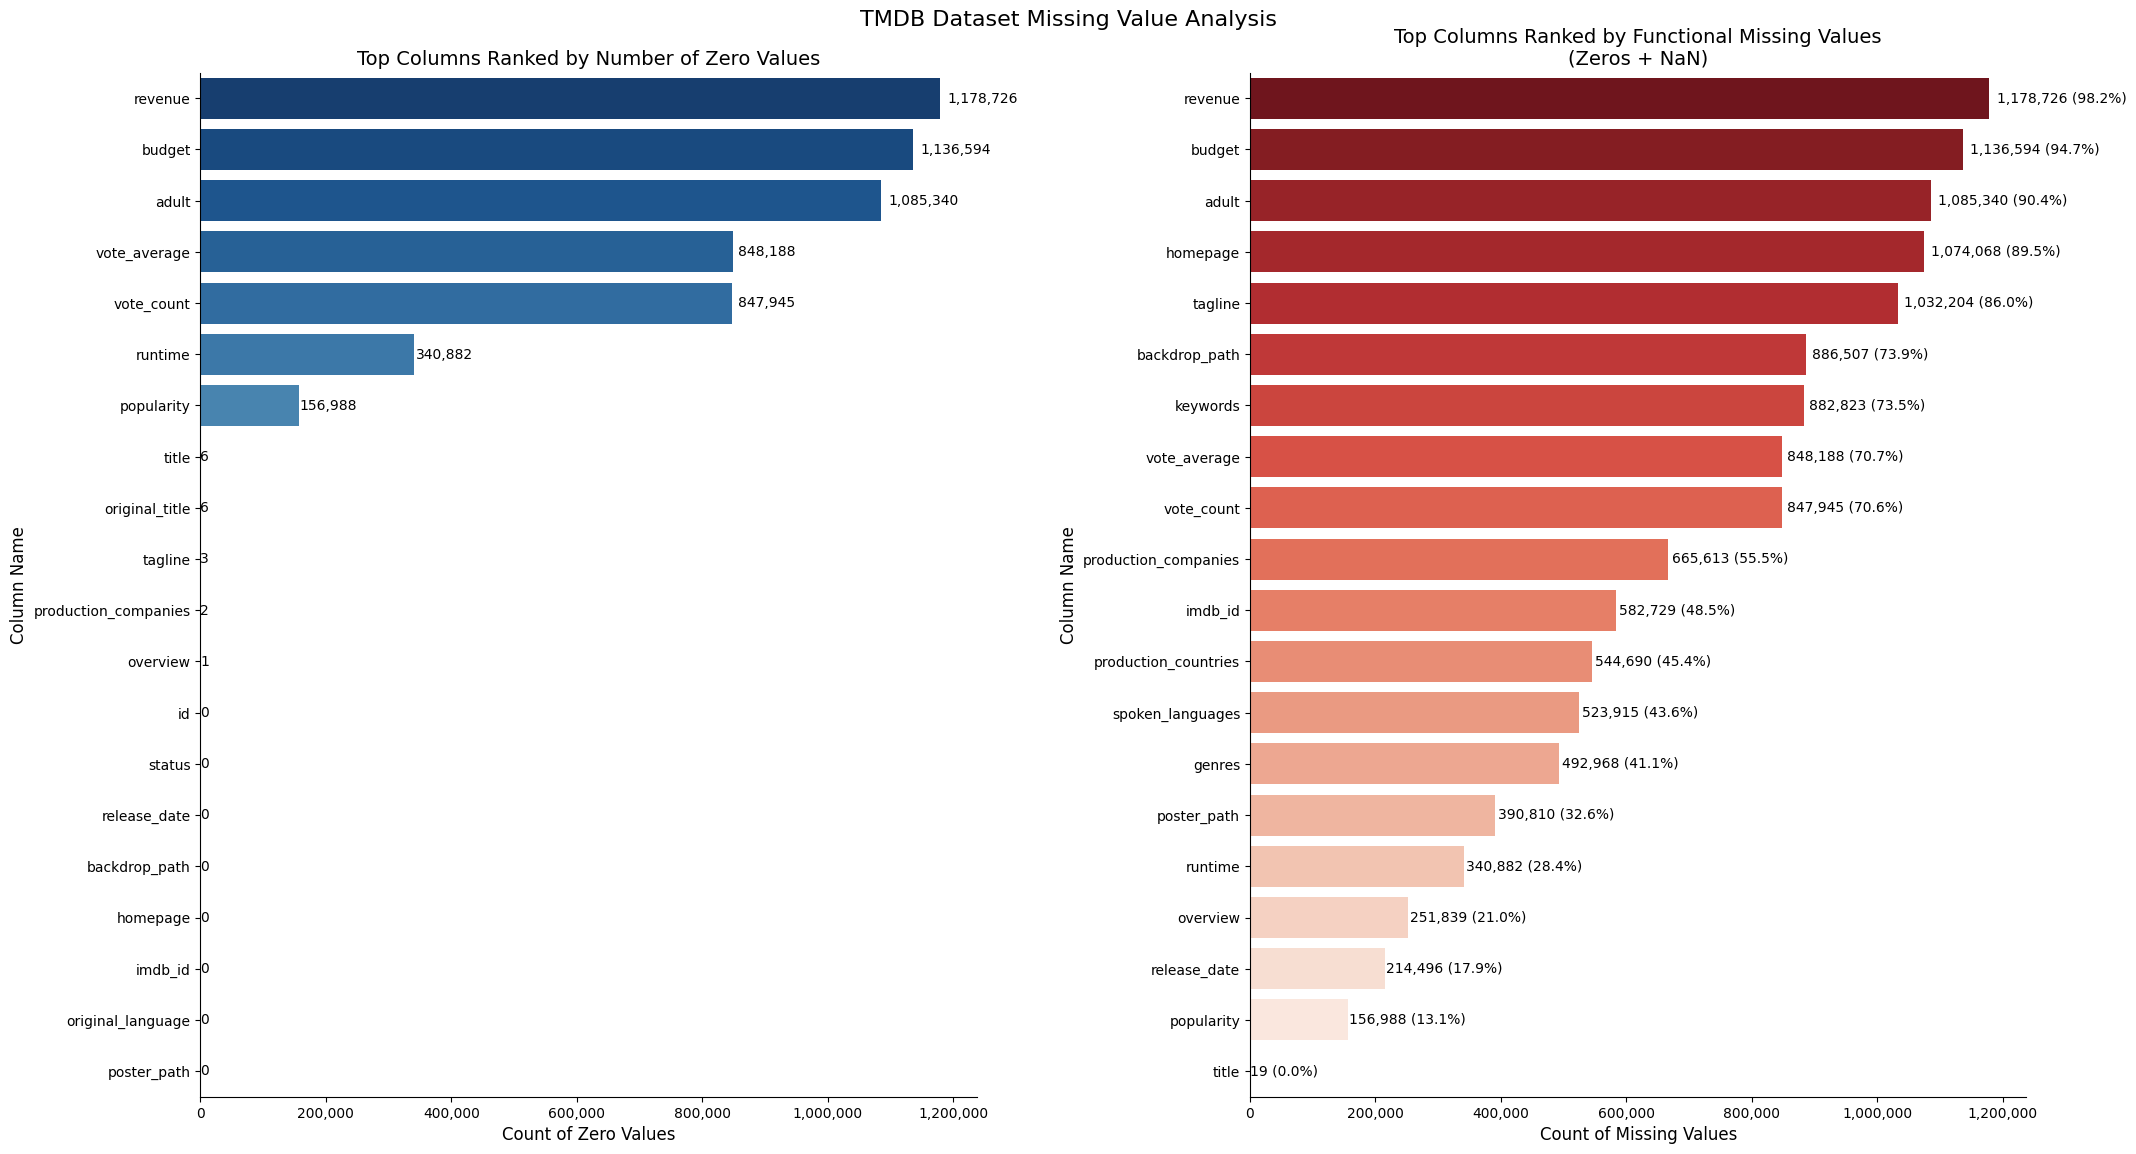

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your TMDB dataset
df = pd.read_csv("/Users/jorgemartinez/Documents/TMDB_movie_dataset_v11.csv")

# Function to create visualizations for zero values and missing values
def visualize_missing_and_zeros(dataframe):
    # Create a figure with two subplots (side by side)
    fig, axes = plt.subplots(1, 2, figsize=(22, 12))
    
    # 1. Count zeros in each column
    zeros_count = {}
    for column in dataframe.columns:
        # For numeric columns
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            zeros_count[column] = (dataframe[column] == 0).sum()
        # For non-numeric columns (strings, etc.)
        else:
            zeros_count[column] = ((dataframe[column] == '0') | 
                                  (dataframe[column] == '') | 
                                  (dataframe[column] == '0.0')).sum()
    
    # Sort the dictionary by values in descending order
    zeros_count = dict(sorted(zeros_count.items(), key=lambda item: item[1], reverse=True))
    
    # Create a DataFrame from the zeros count dictionary
    zeros_df = pd.DataFrame({
        'Column': list(zeros_count.keys()),
        'Zero Count': list(zeros_count.values())
    })
    
    # Only keep top 20 columns if there are many
    if len(zeros_df) > 20:
        zeros_df = zeros_df.head(20)
    
    # Plot the zero counts
    bars0 = sns.barplot(x='Zero Count', y='Column', data=zeros_df, ax=axes[0], palette='Blues_r')
    axes[0].set_title('Top Columns Ranked by Number of Zero Values', fontsize=14)
    axes[0].set_xlabel('Count of Zero Values', fontsize=12)
    axes[0].set_ylabel('Column Name', fontsize=12)
    
    # Add count values to the bars with commas
    for i, v in enumerate(zeros_df['Zero Count']):
        axes[0].text(v + (v * 0.01), i, f"{v:,}", va='center', fontsize=10)
    
    # 2. Count all functional missing values (zeros + NaN)
    missing_count = {}
    for column in dataframe.columns:
        # Count NaN values
        nan_count = dataframe[column].isna().sum()
        
        # Count zero values (based on data type)
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            zero_count = (dataframe[column] == 0).sum()
        else:
            zero_count = ((dataframe[column] == '0') | 
                         (dataframe[column] == '') | 
                         (dataframe[column] == '0.0')).sum()
        
        # Total missing values (NaN + zeros)
        missing_count[column] = nan_count + zero_count
    
    # Sort the dictionary by values in descending order
    missing_count = dict(sorted(missing_count.items(), key=lambda item: item[1], reverse=True))
    
    # Create a DataFrame from the missing count dictionary
    missing_df = pd.DataFrame({
        'Column': list(missing_count.keys()),
        'Missing Count': list(missing_count.values())
    })
    
    # Only keep top 20 columns if there are many
    if len(missing_df) > 20:
        missing_df = missing_df.head(20)
    
    # Plot the missing counts
    bars1 = sns.barplot(x='Missing Count', y='Column', data=missing_df, ax=axes[1], palette='Reds_r')
    axes[1].set_title('Top Columns Ranked by Functional Missing Values\n(Zeros + NaN)', fontsize=14)
    axes[1].set_xlabel('Count of Missing Values', fontsize=12)
    axes[1].set_ylabel('Column Name', fontsize=12)
    
    # Add count values and percentages with better formatting
    total_rows = len(dataframe)
    for i, v in enumerate(missing_df['Missing Count']):
        percentage = (v / total_rows) * 100
        # Position the text a bit away from the end of the bar
        x_pos = v + (v * 0.01)
        # Format with commas and clean percentage
        text = f"{v:,} ({percentage:.1f}%)"
        axes[1].text(x_pos, i, text, va='center', fontsize=10)
    
    # Improve x-axis formatting with commas
    from matplotlib.ticker import FuncFormatter
    def comma_formatter(x, pos):
        return f"{int(x):,}"
    
    axes[0].xaxis.set_major_formatter(FuncFormatter(comma_formatter))
    axes[1].xaxis.set_major_formatter(FuncFormatter(comma_formatter))
    
    # Remove the right spine (border) from both charts
    axes[0].spines['right'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    
    # Also remove top spines for cleaner look
    axes[0].spines['top'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    
    # Adjust layout
    plt.tight_layout(pad=3.0)
    
    # Add overall title
    plt.suptitle('TMDB Dataset Missing Value Analysis', fontsize=16, y=0.98)
    
    return fig

# Run the visualization function
fig = visualize_missing_and_zeros(df)

# Save the figure if needed
# fig.savefig('tmdb_missing_values_analysis.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

In [ ]:
# Increase font overall
#just use percentage for combined visual, rest use absolute values


In [ ]:
1. #think about how to answer the question of what you did about missing data in the analysis.
2. #Create a second graph of NAN

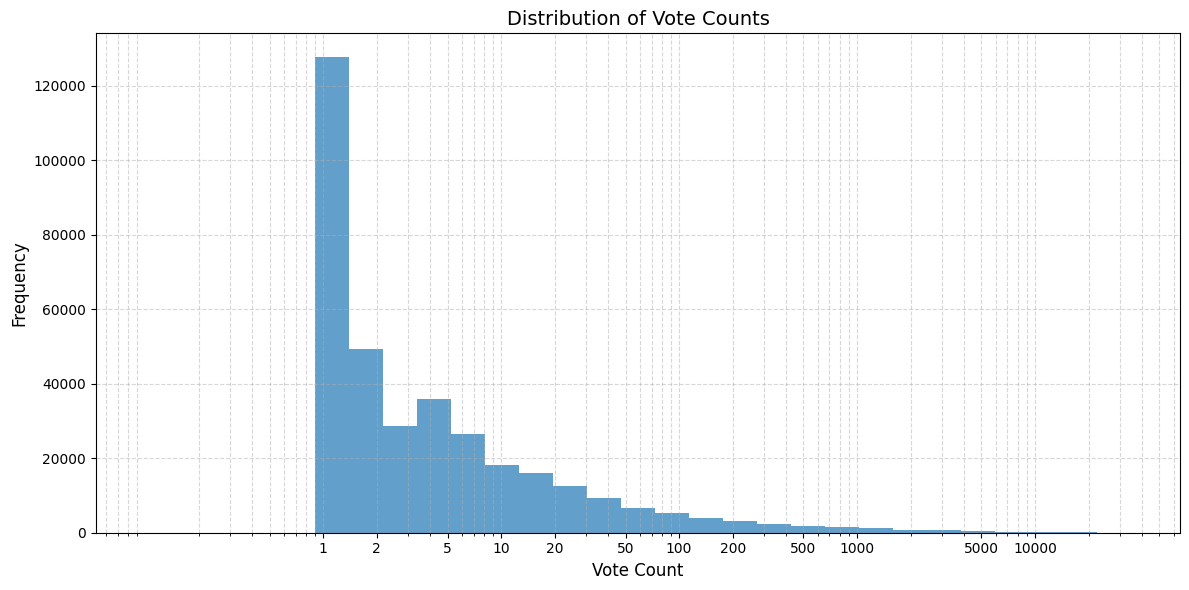

In [10]:
# Import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file manually
import csv

# Read the data
vote_counts = []
with open('TMDB_movie_dataset_v11.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        try:
            vote_count = float(row['vote_count'])
            vote_counts.append(vote_count)
        except (ValueError, KeyError):
            # Skip rows with missing or invalid vote_count
            pass

# Create a histogram
plt.figure(figsize=(12, 6))

# Define bins for the histogram - using log scale
max_count = max(vote_counts)
bins = np.logspace(np.log10(0.1), np.log10(max_count + 1), 30)

# Create the histogram
plt.hist(vote_counts, bins=bins, alpha=0.7)

# Add labels and title
plt.title('Distribution of Vote Counts', fontsize=14)
plt.xlabel('Vote Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Log scale for x-axis with more tick points
plt.xscale('log')

# Customize x-axis ticks to be more readable
# Define specific tick locations
tick_locations = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000]
plt.xticks(tick_locations, labels=[str(x) for x in tick_locations], rotation=0)

# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=10)

# Add minor grid lines to improve readability
plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()